In [60]:
# Importing Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# For Visualization
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=2)
%matplotlib inline


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df_poll_original = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/president_polls.csv')
df_poll_original.head(5)

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,43.2
1,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,47.4
2,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,36.7
3,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,43.4
4,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,IND,Kennedy,31042,Robert F. Kennedy,6.5


In [63]:
df_poll_original.loc[0]

poll_id                                                                  84924
pollster_id                                                               1102
pollster                                                               Emerson
sponsor_ids                                                                NaN
sponsors                                                                   NaN
display_name                                                   Emerson College
pollster_rating_id                                                          88
pollster_rating_name                                           Emerson College
fte_grade                                                                   A-
methodology                                             IVR/Online Panel/Email
transparency_score                                                         7.0
state                                                                      NaN
start_date                                          

In [64]:
df_poll = df_poll_original.copy()

In [65]:
df_poll = df_poll_original[['poll_id','question_id','state','pollster','start_date', 'party','end_date','answer','pct']]
df_poll.head(10)

,poll_id,question_id,state,pollster,start_date,party,end_date,answer,pct
0,84924,188141,NaN,Emerson,12/4/23,DEM,12/6/23,Biden,43.2
1,84924,188141,NaN,Emerson,12/4/23,REP,12/6/23,Trump,47.4
2,84924,188142,NaN,Emerson,12/4/23,DEM,12/6/23,Biden,36.7
3,84924,188142,NaN,Emerson,12/4/23,REP,12/6/23,Trump,43.4
4,84924,188142,NaN,Emerson,12/4/23,IND,12/6/23,Kennedy,6.5
5,84924,188142,NaN,Emerson,12/4/23,IND,12/6/23,West,0.7
6,84924,188142,NaN,Emerson,12/4/23,GRE,12/6/23,Stein,1.1
7,84924,188143,NaN,Emerson,12/4/23,DEM,12/6/23,Biden,38.9
8,84924,188143,NaN,Emerson,12/4/23,REP,12/6/23,Haley,38.6
9,84875,188031,NaN,YouGov,12/2/23,DEM,12/5/23,Biden,42.0


In [66]:
df_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poll_id      4701 non-null   int64  
 1   question_id  4701 non-null   int64  
 2   state        1321 non-null   object 
 3   pollster     4701 non-null   object 
 4   start_date   4701 non-null   object 
 5   party        4701 non-null   object 
 6   end_date     4701 non-null   object 
 7   answer       4701 non-null   object 
 8   pct          4701 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 330.7+ KB


In [67]:
df_poll.start_date.unique()

array(['12/4/23', '12/2/23', '11/29/23', '12/1/23', '11/27/23',
       '11/22/23', '11/25/23', '11/20/23', '11/24/23', '11/17/23',
       '11/16/23', '11/12/23', '11/15/23', '11/14/23', '11/13/23',
       '11/10/23', '11/9/23', '11/11/23', '11/8/23', '11/1/23',
       '10/27/23', '11/7/23', '11/6/23', '11/5/23', '11/2/23', '10/31/23',
       '10/30/23', '11/4/23', '11/3/23', '10/26/23', '10/22/23',
       '10/29/23', '10/28/23', '10/25/23', '10/24/23', '10/17/23',
       '10/23/23', '10/20/23', '10/19/23', '10/21/23', '10/16/23',
       '10/11/23', '10/18/23', '10/13/23', '10/15/23', '10/3/23',
       '10/5/23', '10/14/23', '10/12/23', '10/10/23', '10/9/23',
       '10/8/23', '10/7/23', '10/6/23', '10/2/23', '10/4/23', '10/1/23',
       '9/30/23', '9/29/23', '9/28/23', '9/27/23', '9/26/23', '9/25/23',
       '9/19/23', '9/18/23', '9/24/23', '9/23/23', '9/22/23', '9/20/23',
       '9/21/23', '9/15/23', '9/17/23', '9/16/23', '9/13/23', '6/21/23',
       '9/14/23', '9/7/23', '9/12/23', '9

In [68]:
df_poll['start_date'] = pd.to_datetime(df_poll['start_date'])
df_poll['end_date'] = pd.to_datetime(df_poll['end_date'])

<ipython-input-68-5620b80e91f4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-5620b80e91f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   poll_id      4701 non-null   int64         
 1   question_id  4701 non-null   int64         
 2   state        1321 non-null   object        
 3   pollster     4701 non-null   object        
 4   start_date   4701 non-null   datetime64[ns]
 5   party        4701 non-null   object        
 6   end_date     4701 non-null   datetime64[ns]
 7   answer       4701 non-null   object        
 8   pct          4701 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 330.7+ KB


In [70]:
df_poll = df_poll[['poll_id','question_id','pollster','state','start_date', 'end_date','party','answer','pct']]

In [71]:
df_poll.head(1)

,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct
0,84924,188141,Emerson,NaN,2023-12-04,2023-12-06,DEM,Biden,43.2


In [72]:
df_poll.answer.unique()

array(['Biden', 'Trump', 'Kennedy', 'West', 'Stein', 'Haley', 'Manchin',
       'Mapstead', 'DeSantis', 'Newsom', 'Harris', 'Warren', 'Sanders',
       'Whitmer', 'Ramaswamy', 'Pence', 'M. Obama', 'Romney', 'Scott',
       'Youngkin', 'Christie', 'Hogan', 'Swift', 'Trump Jr.', 'Cohen',
       'Sununu', 'Cheney', 'Buttigieg', 'Rubio', 'Cruz', 'Hawley',
       'Cotton', 'Noem', 'R. Scott', 'Pompeo', 'Pritzker', 'Segal',
       'Yang', 'McConaughey', 'Musk', 'Cuban', 'P. Murphy', 'Clinton'],
      dtype=object)

In [73]:
df_poll = df_poll.loc[df_poll['answer'].isin(['Trump','Biden'])]

In [74]:
df_poll.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [75]:
df_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 0 to 4700
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   poll_id      3588 non-null   int64         
 1   question_id  3588 non-null   int64         
 2   pollster     3588 non-null   object        
 3   state        1017 non-null   object        
 4   start_date   3588 non-null   datetime64[ns]
 5   end_date     3588 non-null   datetime64[ns]
 6   party        3588 non-null   object        
 7   answer       3588 non-null   object        
 8   pct          3588 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 280.3+ KB


In [76]:
df_poll.head(30)

,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct
0,84924,188141,Emerson,NaN,2023-12-04,2023-12-06,DEM,Biden,43.2
1,84924,188141,Emerson,NaN,2023-12-04,2023-12-06,REP,Trump,47.4
2,84924,188142,Emerson,NaN,2023-12-04,2023-12-06,DEM,Biden,36.7
3,84924,188142,Emerson,NaN,2023-12-04,2023-12-06,REP,Trump,43.4
7,84924,188143,Emerson,NaN,2023-12-04,2023-12-06,DEM,Biden,38.9
9,84875,188031,YouGov,NaN,2023-12-02,2023-12-05,DEM,Biden,42.0
10,84875,188031,YouGov,NaN,2023-12-02,2023-12-05,REP,Trump,41.0
11,84889,188200,Fabrizio/GBAO,NaN,2023-11-29,2023-12-04,DEM,Biden,43.0
12,84889,188200,Fabrizio/GBAO,NaN,2023-11-29,2023-12-04,REP,Trump,47.0
13,84889,188201,Fabrizio/GBAO,NaN,2023-11-29,2023-12-04,DEM,Biden,31.0


In [77]:
df_poll.head(15)

,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct
0,84924,188141,Emerson,NaN,2023-12-04,2023-12-06,DEM,Biden,43.2
1,84924,188141,Emerson,NaN,2023-12-04,2023-12-06,REP,Trump,47.4
2,84924,188142,Emerson,NaN,2023-12-04,2023-12-06,DEM,Biden,36.7
3,84924,188142,Emerson,NaN,2023-12-04,2023-12-06,REP,Trump,43.4
7,84924,188143,Emerson,NaN,2023-12-04,2023-12-06,DEM,Biden,38.9
9,84875,188031,YouGov,NaN,2023-12-02,2023-12-05,DEM,Biden,42.0
10,84875,188031,YouGov,NaN,2023-12-02,2023-12-05,REP,Trump,41.0
11,84889,188200,Fabrizio/GBAO,NaN,2023-11-29,2023-12-04,DEM,Biden,43.0
12,84889,188200,Fabrizio/GBAO,NaN,2023-11-29,2023-12-04,REP,Trump,47.0
13,84889,188201,Fabrizio/GBAO,NaN,2023-11-29,2023-12-04,DEM,Biden,31.0


In [78]:
len(df_poll)

3588

In [79]:
df_poll = df_poll[df_poll['state'].notna()]

In [80]:
len(df_poll)

1017

In [81]:
df_poll.head()

,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct
45,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,34.0
46,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,39.0
49,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,43.0
50,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,48.0
51,84850,187865,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,36.0


In [82]:
df_poll.reset_index()

,index,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct
0,45,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,34.0
1,46,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,39.0
2,49,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,43.0
3,50,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,48.0
4,51,84850,187865,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,36.0
...,...,...,...,...,...,...,...,...,...,...
1012,4666,75009,142965,Bendixen & Amandi International,Arizona,2021-06-17,2021-06-23,REP,Trump,44.0
1013,4683,74928,142758,St. Anselm,New Hampshire,2021-05-07,2021-05-10,DEM,Biden,51.0
1014,4684,74928,142758,St. Anselm,New Hampshire,2021-05-07,2021-05-10,REP,Trump,43.0
1015,4689,74706,140769,Remington,Missouri,2021-04-21,2021-04-22,DEM,Biden,38.0


In [83]:
df_poll.head(18)

,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct
45,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,34.0
46,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,39.0
49,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,43.0
50,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,48.0
51,84850,187865,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,36.0
52,84850,187865,J.L. Partners,Georgia,2023-11-27,2023-12-01,REP,Trump,39.0
55,84850,187868,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,44.0
56,84850,187868,J.L. Partners,Georgia,2023-11-27,2023-12-01,REP,Trump,46.0
57,84851,187866,J.L. Partners,Wisconsin,2023-11-27,2023-12-01,DEM,Biden,37.0
58,84851,187866,J.L. Partners,Wisconsin,2023-11-27,2023-12-01,REP,Trump,32.0


In [84]:
df_poll.index = np.arange(1,len(df_poll)+1)


In [85]:
df_poll.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017],
           dtype='int64', length=1017)

In [86]:
df_poll['join_index'] = df_poll.index+1

In [87]:
df_poll['join_index']

1          2
2          3
3          4
4          5
5          6
        ... 
1013    1014
1014    1015
1015    1016
1016    1017
1017    1018
Name: join_index, Length: 1017, dtype: int64

In [88]:
odd_rows = df_poll[df_poll.index % 2 == 1]

In [89]:
odd_rows

,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct,join_index
1,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,34.0,2
3,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,43.0,4
5,84850,187865,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,36.0,6
7,84850,187868,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,44.0,8
9,84851,187866,J.L. Partners,Wisconsin,2023-11-27,2023-12-01,DEM,Biden,37.0,10
...,...,...,...,...,...,...,...,...,...,...
1009,75620,144418,Susquehanna,Florida,2021-08-04,2021-08-10,DEM,Biden,50.0,1010
1011,75620,144419,Susquehanna,Florida,2021-08-04,2021-08-10,DEM,Biden,49.0,1012
1013,75009,142965,Bendixen & Amandi International,Arizona,2021-06-17,2021-06-23,REP,Trump,44.0,1014
1015,74928,142758,St. Anselm,New Hampshire,2021-05-07,2021-05-10,REP,Trump,43.0,1016


In [90]:
grouped = odd_rows.join(df_poll,'join_index',rsuffix = ' second')
grouped

,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct,join_index,poll_id second,question_id second,pollster second,state second,start_date second,end_date second,party second,answer second,pct second,join_index second
1,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,34.0,2,84849.0,187864.0,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,39.0,3.0
3,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,43.0,4,84849.0,187867.0,J.L. Partners,Arizona,2023-11-27,2023-12-01,REP,Trump,48.0,5.0
5,84850,187865,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,36.0,6,84850.0,187865.0,J.L. Partners,Georgia,2023-11-27,2023-12-01,REP,Trump,39.0,7.0
7,84850,187868,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,44.0,8,84850.0,187868.0,J.L. Partners,Georgia,2023-11-27,2023-12-01,REP,Trump,46.0,9.0
9,84851,187866,J.L. Partners,Wisconsin,2023-11-27,2023-12-01,DEM,Biden,37.0,10,84851.0,187866.0,J.L. Partners,Wisconsin,2023-11-27,2023-12-01,REP,Trump,32.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,75620,144418,Susquehanna,Florida,2021-08-04,2021-08-10,DEM,Biden,50.0,1010,75620.0,144418.0,Susquehanna,Florida,2021-08-04,2021-08-10,REP,Trump,42.0,1011.0
1011,75620,144419,Susquehanna,Florida,2021-08-04,2021-08-10,DEM,Biden,49.0,1012,75009.0,142965.0,Bendixen & Amandi International,Arizona,2021-06-17,2021-06-23,DEM,Biden,51.0,1013.0
1013,75009,142965,Bendixen & Amandi International,Arizona,2021-06-17,2021-06-23,REP,Trump,44.0,1014,74928.0,142758.0,St. Anselm,New Hampshire,2021-05-07,2021-05-10,DEM,Biden,51.0,1015.0
1015,74928,142758,St. Anselm,New Hampshire,2021-05-07,2021-05-10,REP,Trump,43.0,1016,74706.0,140769.0,Remington,Missouri,2021-04-21,2021-04-22,DEM,Biden,38.0,1017.0


In [91]:
df_poll.state.unique()

array(['Arizona', 'Georgia', 'Wisconsin', 'Florida', 'Michigan',
       'North Carolina', 'Pennsylvania', 'Virginia', 'Minnesota',
       'Nebraska', 'California', 'Washington', 'New York',
       'New Hampshire', 'Ohio', 'Nevada', 'Massachusetts', 'Alaska',
       'Texas', 'Tennessee', 'Missouri', 'Idaho', 'Kansas',
       'West Virginia', 'Indiana', 'Iowa', 'North Dakota', 'South Dakota',
       'Illinois', 'Arkansas', 'Colorado', 'Montana', 'Wyoming',
       'Kentucky', 'Oklahoma', 'Maryland', 'Alabama', 'New Mexico',
       'Oregon', 'Utah', 'Connecticut', 'Rhode Island', 'Maine',
       'Louisiana', 'South Carolina', 'Mississippi'], dtype=object)

In [92]:
states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

In [93]:
def getBiden(row):
    return row['pct'] if row['answer'] == 'Biden' else row['pct second']

def getTrump(row):
    return row['pct'] if row['answer'] == 'Trump' else row['pct second']

def getSeats(row):
    return states[row['state']]

grouped["Biden"] = grouped.apply(getBiden, axis=1)
grouped["Trump"] = grouped.apply(getTrump, axis=1)
grouped["Seats"] = grouped.apply(getSeats, axis=1)

grouped.head()


,poll_id,question_id,pollster,state,start_date,end_date,party,answer,pct,join_index,...,state second,start_date second,end_date second,party second,answer second,pct second,join_index second,Biden,Trump,Seats
1,84849,187864,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,34.0,2,...,Arizona,2023-11-27,2023-12-01,REP,Trump,39.0,3.0,34.0,39.0,11
3,84849,187867,J.L. Partners,Arizona,2023-11-27,2023-12-01,DEM,Biden,43.0,4,...,Arizona,2023-11-27,2023-12-01,REP,Trump,48.0,5.0,43.0,48.0,11
5,84850,187865,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,36.0,6,...,Georgia,2023-11-27,2023-12-01,REP,Trump,39.0,7.0,36.0,39.0,16
7,84850,187868,J.L. Partners,Georgia,2023-11-27,2023-12-01,DEM,Biden,44.0,8,...,Georgia,2023-11-27,2023-12-01,REP,Trump,46.0,9.0,44.0,46.0,16
9,84851,187866,J.L. Partners,Wisconsin,2023-11-27,2023-12-01,DEM,Biden,37.0,10,...,Wisconsin,2023-11-27,2023-12-01,REP,Trump,32.0,11.0,37.0,32.0,10


In [94]:
import matplotlib.pyplot as plt


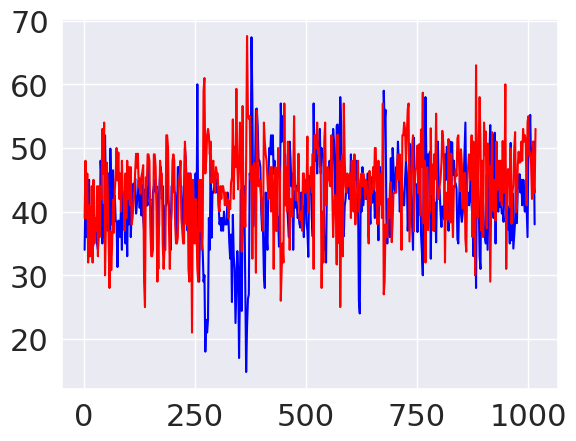

In [95]:
plt.plot(grouped.index,grouped.Biden,color = 'blue')
plt.plot(grouped.index,grouped.Trump,color = 'red')

In [96]:
diff_by_date = grouped.groupby('start_date')[['Biden','Trump']].mean().reset_index()

In [97]:
diff_by_date.head()

,start_date,Biden,Trump
0,2021-04-21,NaN,53.0
1,2021-05-07,38.0,43.0
2,2021-06-17,51.0,44.0
3,2021-08-04,49.5,46.5
4,2021-08-16,48.0,47.4


In [98]:
diff_by_date ['Biden'] = diff_by_date[['Biden']].fillna(diff_by_date['Biden'].mean()).round(1)

In [99]:
diff_by_date.head()

,start_date,Biden,Trump
0,2021-04-21,43.2,53.0
1,2021-05-07,38.0,43.0
2,2021-06-17,51.0,44.0
3,2021-08-04,49.5,46.5
4,2021-08-16,48.0,47.4


In [100]:
diff_by_date['Trump'] = diff_by_date[['Trump']].fillna(diff_by_date['Trump'].mean())

In [101]:
diff_by_date.head()

,start_date,Biden,Trump
0,2021-04-21,43.2,53.0
1,2021-05-07,38.0,43.0
2,2021-06-17,51.0,44.0
3,2021-08-04,49.5,46.5
4,2021-08-16,48.0,47.4


In [102]:
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']

In [103]:
diff_by_date.head()

,start_date,Biden,Trump,difference
0,2021-04-21,43.2,53.0,-9.8
1,2021-05-07,38.0,43.0,-5.0
2,2021-06-17,51.0,44.0,7.0
3,2021-08-04,49.5,46.5,3.0
4,2021-08-16,48.0,47.4,0.6


In [104]:
diff_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  184 non-null    datetime64[ns]
 1   Biden       184 non-null    float64       
 2   Trump       184 non-null    float64       
 3   difference  184 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.9 KB


In [105]:
import plotly.express as px
fig = px.line(diff_by_date,x = 'start_date',y='difference',title='Biden vs Trump Difference')
fig.show()

In [106]:
polls = grouped[['state', 'pollster','end_date','Biden','Trump','Seats']]
polls.head()

,state,pollster,end_date,Biden,Trump,Seats
1,Arizona,J.L. Partners,2023-12-01,34.0,39.0,11
3,Arizona,J.L. Partners,2023-12-01,43.0,48.0,11
5,Georgia,J.L. Partners,2023-12-01,36.0,39.0,16
7,Georgia,J.L. Partners,2023-12-01,44.0,46.0,16
9,Wisconsin,J.L. Partners,2023-12-01,37.0,32.0,10


In [107]:
def get_center(row):
    return row['Biden']+ (100-row['Trump']-row['Biden'])/2
polls['Center'] = polls.apply(get_center,axis = 1)

def get_deviation(row):
    return (abs(row['Trump'] - row["Center"]) / 2) + 3
polls['Stddev'] = polls.apply(get_deviation,axis = 1)

polls.head()

<ipython-input-107-b5fb3d26027c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-b5fb3d26027c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,pollster,end_date,Biden,Trump,Seats,Center,Stddev
1,Arizona,J.L. Partners,2023-12-01,34.0,39.0,11,47.5,7.25
3,Arizona,J.L. Partners,2023-12-01,43.0,48.0,11,47.5,3.25
5,Georgia,J.L. Partners,2023-12-01,36.0,39.0,16,48.5,7.75
7,Georgia,J.L. Partners,2023-12-01,44.0,46.0,16,49.0,4.50
9,Wisconsin,J.L. Partners,2023-12-01,37.0,32.0,10,52.5,13.25


In [108]:
polls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 1 to 1017
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     509 non-null    object        
 1   pollster  509 non-null    object        
 2   end_date  509 non-null    datetime64[ns]
 3   Biden     508 non-null    float64       
 4   Trump     509 non-null    float64       
 5   Seats     509 non-null    int64         
 6   Center    508 non-null    float64       
 7   Stddev    508 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 35.8+ KB


In [109]:
polls.groupby('state')['Stddev'].mean().round(2)

state
Alabama            8.50
Alaska             7.00
Arizona            6.49
Arkansas          10.75
California        16.77
Colorado           7.96
Connecticut       10.29
Florida            5.02
Georgia            5.70
Idaho              9.00
Illinois          11.82
Indiana            5.18
Iowa               5.63
Kansas             7.88
Kentucky          10.79
Louisiana          8.00
Maine             10.65
Maryland          11.23
Massachusetts     17.20
Michigan           7.11
Minnesota          7.98
Mississippi        9.25
Missouri           6.74
Montana            7.52
Nebraska           8.92
Nevada             5.65
New Hampshire      7.57
New Mexico         9.79
New York          14.00
North Carolina     6.01
North Dakota      11.55
Ohio               6.89
Oklahoma          11.96
Oregon            12.19
Pennsylvania       6.87
Rhode Island      14.12
South Carolina     4.84
South Dakota       7.28
Tennessee         10.01
Texas              5.86
Utah               4.85
Virginia  

In [110]:
poll_state_summary = polls.groupby('state').mean().reset_index()
poll_state_summary

<ipython-input-110-ced6738cefb2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,state,Biden,Trump,Seats,Center,Stddev
0,Alabama,49.000000,57.000000,9.0,46.000000,8.500000
1,Alaska,37.000000,41.666667,3.0,47.666667,7.000000
2,Arizona,41.088372,43.520930,11.0,48.783721,6.491860
3,Arkansas,34.600000,55.200000,6.0,39.700000,10.750000
4,California,50.935294,32.058824,55.0,59.438235,16.766176
5,Colorado,42.614286,40.928571,9.0,50.842857,7.957143
6,Connecticut,43.475000,38.100000,7.0,52.687500,10.293750
7,Florida,42.751852,46.096296,29.0,48.327778,5.021296
8,Georgia,41.425000,45.109091,16.0,48.157955,5.696023
9,Idaho,39.500000,54.500000,4.0,42.500000,9.000000


In [111]:
from numpy.random import normal

def run_election_simulation(times, polls):
    # Create a blank data frame to hold our results
    result_frame = pd.DataFrame()

    def get_seats(row):
        # using the Normal Distriution function, we input the mean (center) and STD
        # if the result is great than 50, that indicates a win for Biden
        result = normal(row["Center"], row["Stddev"])
        return row["Seats"] if result > 50 else 0

    for i in range(times):
        result_frame[i] = polls.apply(get_seats, axis=1)

    return result_frame

# given an example of the output
res = run_election_simulation(10, poll_state_summary)
res.loc['Total',:] = res.sum(axis=0)

# Adding State Name to Results DF
res = pd.concat([poll_state_summary['state'], res], axis=1, sort=False)

# A 0.0 means Biden didn't win that seat, or that Trump won that seat
res

,state,0,1,2,3,4,5,6,7,8,9
0,Alabama,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,0.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
2,Arizona,0.0,0.0,0.0,0.0,0.0,11.0,0.0,11.0,0.0,11.0
3,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,California,55.0,55.0,55.0,0.0,55.0,55.0,0.0,55.0,0.0,55.0
5,Colorado,0.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,9.0
6,Connecticut,7.0,7.0,0.0,0.0,7.0,7.0,7.0,7.0,0.0,0.0
7,Florida,0.0,29.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0
8,Georgia,0.0,0.0,0.0,16.0,0.0,16.0,0.0,16.0,0.0,0.0
9,Idaho,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [112]:
summary = pd.DataFrame((res == 0).astype(int).sum(axis=1))

In [113]:
summary.head()

,0
0,9
1,6
2,7
3,9
4,3


In [114]:
# Convert values to intergers


# Add back states to leftmost column
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort=False)
res_summary.columns = ['state', 'trump_wins']

# Get a percentage of times Trump Won in the simulations
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / 10) * 100
res_summary

,state,trump_wins,percent_trump_wins
0,Alabama,9,90.0
1,Alaska,6,60.0
2,Arizona,7,70.0
3,Arkansas,9,90.0
4,California,3,30.0
5,Colorado,6,60.0
6,Connecticut,4,40.0
7,Florida,8,80.0
8,Georgia,7,70.0
9,Idaho,8,80.0


In [115]:
res.loc['Total'][res.loc['Total'] > 270.0].count()

1

In [116]:
# SIMULATE 10000 TIMES
number_of_simulations = 10000

election_results = run_election_simulation(number_of_simulations, poll_state_summary)

election_results.loc['Total',:] = election_results.sum(axis=0)

biden_wins = election_results.loc['Total'][election_results.loc['Total'] > 270.0].count()

# Print output
f"Joe Biden wins {biden_wins} times out of {number_of_simulations} simulations"

Streaming output truncated to the last 5000 lines.
<ipython-input-111-c0fe413b2870>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-111-c0fe413b2870>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-111-c0fe413b2870>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<

'Joe Biden wins 1862 times out of 10000 simulations'

In [117]:
summary = pd.DataFrame((election_results == 0).astype(int).sum(axis=1))
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort=False)
res_summary.columns = ['state', 'trump_wins']
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / number_of_simulations) * 100
res_summary['percent_biden_wins'] = 100 - res_summary['percent_trump_wins']
res_summary = res_summary.dropna()
res_summary#.sort_values(by="trump_wins")

,state,trump_wins,percent_trump_wins,percent_biden_wins
0,Alabama,6849,68.49,31.51
1,Alaska,6291,62.91,37.09
2,Arizona,5747,57.47,42.53
3,Arkansas,8307,83.07,16.93
4,California,2818,28.18,71.82
5,Colorado,4576,45.76,54.24
6,Connecticut,3855,38.55,61.45
7,Florida,6331,63.31,36.69
8,Georgia,6237,62.37,37.63
9,Idaho,7951,79.51,20.49


In [118]:
res_summary.sort_values('percent_biden_wins', ascending=False).head(30)

,state,trump_wins,percent_trump_wins,percent_biden_wins
4,California,2818,28.18,71.82
17,Maryland,2995,29.95,70.05
16,Maine,2997,29.97,70.03
33,Oregon,3046,30.46,69.54
35,Rhode Island,3109,31.09,68.91
18,Massachusetts,3150,31.50,68.50
28,New York,3295,32.95,67.05
10,Illinois,3384,33.84,66.16
42,Washington,3480,34.80,65.20
27,New Mexico,3837,38.37,61.63


In [119]:
def getSeats(row):
    return states[row["state"]]

res_summary["seats"] = res_summary.apply(getSeats, axis=1)

res_summary['seats_trump_wins'] = res_summary['percent_trump_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_trump_wins'] = res_summary['seats_trump_wins'] * res_summary['seats']

res_summary['seats_biden_wins'] = res_summary['percent_biden_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_biden_wins'] = res_summary['seats_biden_wins'] * res_summary['seats']
seats_trump_wins = res_summary['seats_trump_wins'].sum()
seats_biden_wins = res_summary['seats_biden_wins'].sum()
print(seats_biden_wins)
print(seats_trump_wins)
res_summary

230
281


,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,Alabama,6849,68.49,31.51,9,9,0
1,Alaska,6291,62.91,37.09,3,3,0
2,Arizona,5747,57.47,42.53,11,11,0
3,Arkansas,8307,83.07,16.93,6,6,0
4,California,2818,28.18,71.82,55,0,55
5,Colorado,4576,45.76,54.24,9,0,9
6,Connecticut,3855,38.55,61.45,7,0,7
7,Florida,6331,63.31,36.69,29,29,0
8,Georgia,6237,62.37,37.63,16,16,0
9,Idaho,7951,79.51,20.49,4,4,0


In [120]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

res_summary = res_summary.replace({"state": us_state_abbrev})
res_summary.head()

,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,AL,6849,68.49,31.51,9,9,0
1,AK,6291,62.91,37.09,3,3,0
2,AZ,5747,57.47,42.53,11,11,0
3,AR,8307,83.07,16.93,6,6,0
4,CA,2818,28.18,71.82,55,0,55


In [123]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = res_summary['state'], # Spatial coordinates
    z = res_summary['percent_trump_wins'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Trump",
))

title = f'{number_of_simulations} Simulations of the 2024 US Election show Biden winning {seats_biden_wins} and Trump winning {seats_trump_wins} Seats'
fig.update_layout(
    title_text = title, #'2024 Simulation of The US Presidential Election',
    geo_scope='usa', # limite map scope to USA
)

fig.show()